In [694]:
from math import pi

In [695]:
class Engine:
    def __init__(self, power, ratio_gears, ratio_differential, radius_wheel, torque_output):
        self.power = power
        self.ratio_gears = ratio_gears
        self.ratio_differential = ratio_differential
        self.radius_wheel = radius_wheel
        self.torque_output = torque_output

        self.gear = 1
        self.rpm = 2000
        self.max_rpm = 10000
        self.min_rpm = 100
        self.speed = 0

    def calc_speed(self, rpm):
        return (rpm * 2 * pi * self.radius_wheel) / (self.ratio_gears[self.gear - 1] * self.ratio_differential * 60)

    def calc_rpm(self, speed):
        return max(self.min_rpm, min(self.max_rpm, (speed * self.ratio_gears[self.gear - 1] * self.ratio_differential * 60) / (2 * pi * self.radius_wheel)))

    def step(self, delta_t):
        # 1. Calculate engine force
        force_engine = self.force_wheel(self.rpm)
        
        # For now, we'll assume the only force acting on the car is the engine force.
        # Later on, you can subtract drag and other forces from this.
        net_force = force_engine
        #print("net force ", net_force)
        # 2. Update speed based on net force
        # Assuming a constant car mass for simplicity
        car_mass = 550  # kg, this can be an attribute of the class
        acceleration = net_force / car_mass
        self.speed += acceleration * delta_t
        
        # 3. Update RPM based on new speed
        #print(f'rpm - {self.rpm} - before speed {self.speed}')
        self.rpm = self.calc_rpm(self.speed)
        #print(f'rpm - {self.rpm} - after speed {self.speed}')
        
    def torque_wheel(self, rpm):
        return self.torque_output(rpm) * self.ratio_gears[self.gear - 1]
    
    def force_wheel(self, rpm):
        return self.torque_wheel(rpm) / self.radius_wheel

In [696]:
def ms_to_kph(speed_ms):
    return 3.6 * speed_ms

def torque_output(rpm):
    a = -0.00017 / 10
    b = 15 / 100
    c = 20000 / 100
    return max(0, a * rpm * rpm + b * rpm + c)

engine = Engine(
    power=5000,
    ratio_gears=[3.5, 2.8, 2.1, 1.7, 1.3, 1],
    ratio_differential=4,
    radius_wheel=0.3,
    torque_output = torque_output
)

Text(0, 0.5, 'Torque (Nm)')

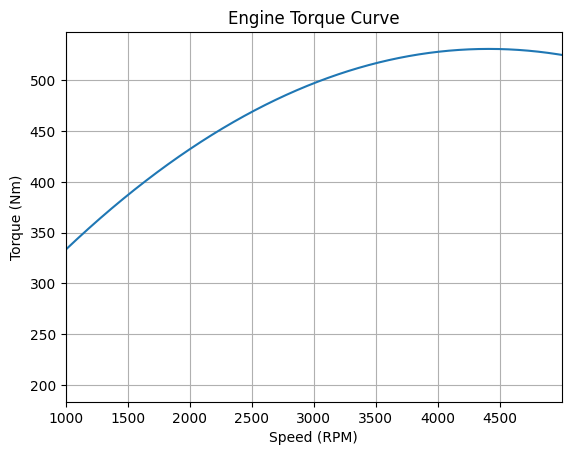

In [697]:
import numpy as np

rpms = np.arange(0, 5000)
torque = [engine.torque_output(rpm) for rpm in rpms]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(torque)
ax.grid()
ax.set_xlim([1000, np.max(rpms)])
ax.set_title('Engine Torque Curve')
ax.set_xlabel('Speed (RPM)')
ax.set_ylabel('Torque (Nm)')

rpm - 2000 - before speed 0.9163636363636365
rpm - 408.36264671142317 - after speed 0.9163636363636365
rpm - 408.36264671142317 - before speed 1.4645261615002196
rpm - 652.6424180924462 - after speed 1.4645261615002196
rpm - 652.6424180924462 - before speed 2.0810678057474123
rpm - 927.3942389434937 - after speed 2.0810678057474123
rpm - 927.3942389434937 - before speed 2.7693759275759047
rpm - 1234.1276308295423 - after speed 2.7693759275759047
rpm - 1234.1276308295423 - before speed 3.531372461599833
rpm - 1573.6990728541818 - after speed 3.531372461599833
rpm - 1573.6990728541818 - before speed 4.367032189672724
rpm - 1946.0973269579447 - after speed 4.367032189672724
rpm - 1946.0973269579447 - before speed 5.273915253731115
rpm - 2350.235109821352 - after speed 5.273915253731115
rpm - 2350.235109821352 - before speed 6.2467752118557875
rpm - 2783.774429382157 - after speed 6.2467752118557875
rpm - 2783.774429382157 - before speed 7.277315982184003
rpm - 3243.0182708174593 - after s

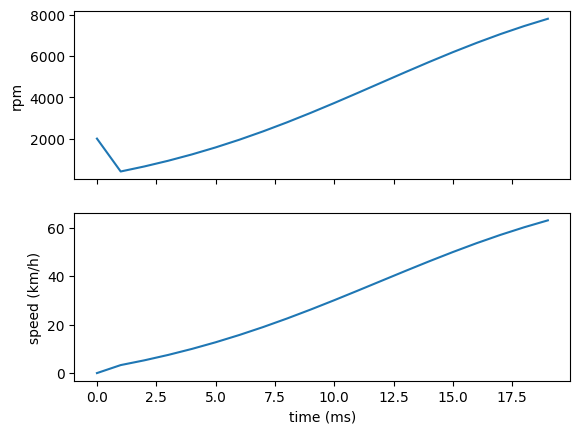

In [698]:
rpm_evolution = []
speed_evolution = []
for i in range(20):
    #print(f'Step {i} - Engine RPM : {engine.rpm} RPM | Car speed : {engine.speed} m/s')
    rpm_evolution = np.append(rpm_evolution, engine.rpm)
    speed_evolution = np.append(speed_evolution, ms_to_kph(engine.speed))
    engine.step(0.1)

fig, axes = plt.subplots(nrows=2, sharex=True)

axes[0].set_ylabel('rpm')
axes[0].plot(rpm_evolution)
axes[1].set_xlabel('time (ms)')
axes[1].set_ylabel('speed (km/h)')
axes[1].plot(speed_evolution)